# STAT 542 - Statistical Learning

# Homework 2 - Manan Mehta (mananm2)

## Due: 09/07/2020

## About HW2


For this HW, we mainly try to understand the KNN method in both classification and regression settings and use it to perform several real data examples. Tuning the model will help us understand the bias-variance trade-off. A slightly more challenging task is to code a KNN method yourself. For that question, you cannot use any additional package to assist the calculation.

In [1]:
#Import all necessary packages
import numpy as np
import pandas as pd
import random
from scipy.stats import norm
from scipy.stats import uniform

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

## Question 1 (20 Points) KNN Classification (Diabetes)

Load the Pima Indians Diabetes Database. Randomly split the data into training and testing.

Read the documentation of this dataset [here](https://cran.r-project.org/web/packages/mlbench/mlbench.pdf) and make sure that you understand the goal of this classification problem.

Use a grid of $k$ values (every integer) from 1 to 20. Fit the KNN model and calculate both training and testing errors. Plot the two errors against the corresponding $k$ values. Make sure that you differentiate them using different colors/shapes and add proper legends. Does the plot match (approximately) our intuition of the bias-variance trade-off in terms of having an U-shaped error? What is the optimal $k$ value based on this result?

In [2]:
#To run this script, you must have the diabetes.csv dataset
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Divide into features and labels
#label = 0 ---> No Diabetes
#label = 1 ---> Diabetes
X = df.values[:,:-1]
y = df.values[:,-1]

#Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2)

#Fit KNN for n = 1 to 20
#Save the training and testing errors
k = range(1 , 21)
training_error, testing_error = [], []
for n_neighbors in k:
    neigh = KNeighborsClassifier(n_neighbors = n_neighbors)
    neigh.fit(X_train, y_train)
    neigh.predict(X_test)
    training_error.append(1 - neigh.score(X_train, y_train))
    testing_error.append(1 - neigh.score(X_test, y_test))

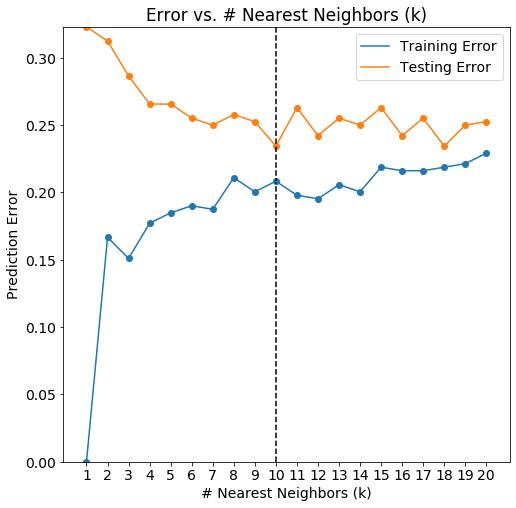

In [4]:
#Plot the training and testing errors vs. k
plt.figure(figsize = (8,8))
plt.plot(k, training_error, label = 'Training Error')
plt.scatter(k, training_error)
plt.plot(k, testing_error, label =  'Testing Error')
plt.scatter(k, testing_error)

plt.vlines(np.argmin(testing_error) + 1, 0, 1, ls = '--')

plt.ylim([0, max(testing_error)])
plt.xticks(k)
plt.xlabel('# Nearest Neighbors (k)')
plt.ylabel('Prediction Error')
plt.legend()
plt.title('Error vs. # Nearest Neighbors (k)')
plt.show()

Yes, the plot does match our intuition of the bias-variance trade-off, given the U-Shaped testing error curve. The optimal $k$ value in this case is $k = 10$

## Question 2 (20 Points) KNN Classification (Handwritten Digits)

Load the Handwritten Digit Data. Use a grid of $k$ values (every integer) from 1 to 20. Fit the KNN model using **a randomly selected subset of training data with size 500** as the training data and calculate both training and testing errors. Make sure to set a random seed so that your result can be replicated. Plot the two errors against the corresponding $k$ values. Make sure that you differentiate them using different colors/shapes and add proper legends. What is the optimal $k$ value? Does the plot match our intuition of the bias-variance trade-off in terms of having an U-shaped error? If not, which theoretical result we introduced in the lecture can be used to explain it? Provide your explanation of the results.

In [5]:
digits_train = np.loadtxt('zip.train')
digits_test = np.loadtxt('zip.test')
train_df = pd.DataFrame(digits_train)
test_df = pd.DataFrame(digits_test)

In [6]:
random.seed(5)
trainID = random.sample(range(len(train_df)) , 500)
train_df = train_df.iloc[trainID]

#Split the data into training and test
X_train, y_train = train_df.values[:,1:], train_df.values[:,0]
X_test, y_test  = test_df.values[:,1:], test_df.values[:,0]

#Fit KNN for n = 1 to 20
#Save the training and testing errors
k = range(1 , 21)
training_error, testing_error = [], []
for n_neighbors in k:
    neigh = KNeighborsClassifier(n_neighbors = n_neighbors)
    neigh.fit(X_train, y_train)
    neigh.predict(X_test)
    training_error.append(1 - neigh.score(X_train, y_train))
    testing_error.append(1 - neigh.score(X_test, y_test))

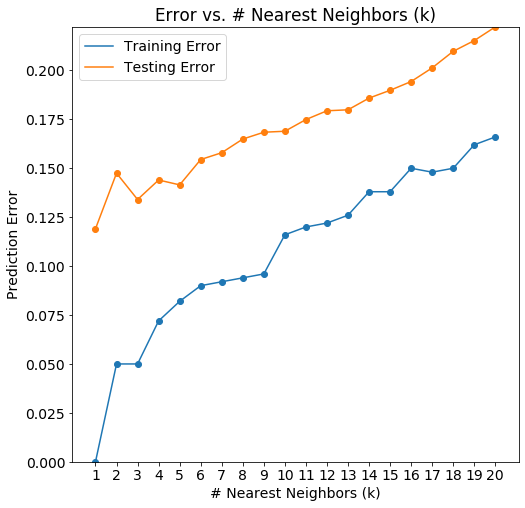

In [7]:
#Plot the training and testing errors vs. k
plt.figure(figsize = (8,8))
plt.plot(k, training_error, label = 'Training Error')
plt.scatter(k, training_error)
plt.plot(k, testing_error, label =  'Testing Error')
plt.scatter(k, testing_error)

plt.ylim([0, max(testing_error)])
plt.xticks(k)
plt.xlabel('# Nearest Neighbors (k)')
plt.ylabel('Prediction Error')
plt.legend()
plt.title('Error vs. # Nearest Neighbors (k)')
plt.show()

The dataset for the Handwriteen digit classification is a "well-segregated" dataset. Since there is a lower-dimensional subspace (manifold) in the dataset, the total volume of the data is reduced despite the high dimensionality. This also means that the data is well-clustered i.e. there are more similar samples within the neighbourhood of an existing sample. Thus, we see that as k increases, the bias increases at a mich higher rate than the rate of decrease of variance. Thus, the optimal classification is obtained for 1-NN. 

## Question 3 (40 Points) Write your own KNN for regression

For this question, you **cannot** use (load) any additional `Python` packages. Complete the following steps.

a. [30 points] Generate the covariate of $n = 1000$ training data, with $p=5$ from independent standard Normal distribution. Then, generate $Y$ from 

$$ Y = X_1 + 0.5 \times X_2 - X_3 + \epsilon,$$

with i.i.d. standard normal error $\epsilon$. Write a function `myknn(xtest, xtrain, ytrain, k)` that fits a KNN model and predict multiple target points `xtest`. Here `xtrain` is the training dataset covariate value, `ytrain` is the training data outcome, and `k` is the number of nearest neighbors. Use the euclidean distance to evaluate the closeness between two points. 
  
  Test your code using the first 500 observations as the training data and the rest as testing data. Predict the $Y$ values using your KNN function with `k = 5`. Evaluate the prediction accuracy using mean squared error
$$\frac{1}{N}\sum_i (y_i - \widehat y_i)^2$$

In [8]:
def myknn(xtest, xtrain, ytrain, k):
    '''
    A function to fit a K-Nearest Neighbor Model on the training data.
    Inputs:
    - xtest  : testing dataset covariates (n_test x p)
    - xtrain : training dataset covariates (n_train x p)
    - ytrain : training dataset outcomes (n_train x 1)
    - k      : number of nearest neighbors to use in fitting
    
    Outputs:
    - ypredicted : predicted testing outcomes (n_test x 1)
    '''
    
    #First calculate the distance of each testing point with each training point
    n_train, n_test = xtrain.shape[0] , xtest.shape[0]
    distmat = np.ones([n_train , n_test])
    for i in range(n_train):
        for j in range(n_test):
            distmat[i , j] = np.linalg.norm(xtrain[i] - xtest[j])
    
    #For each testing point, find the indices of the k minimum distances
    argmatrix = np.zeros([n_test, k])
    i = 0
    for testpt in distmat.T:
        argmatrix[i] = np.argpartition(testpt , k)[:k]
        i+=1
    
    #Predict the test outcomes by taking the mean of the k neighbors
    y_predicted = np.zeros([n_test])
    for i in range(n_test):
        y_predicted[i] = np.mean([y_train[int(k)] for k in argmatrix[i]])
    
    return y_predicted

In [9]:
#Generate data
seed = 1
n , p = 1000 , 5
X = norm.rvs(size = (n,p), random_state = seed)
epsilon = norm.rvs(size = n, random_state = seed)

y = X.dot([1 , 0.5 , -1 , 0 , 0]) + epsilon

X_train, y_train, X_test, y_test = X[:500,:] , y[:500], X[500:,:], y[500:]

In [10]:
y_predicted = myknn(X_test, X_train, y_train, 5)
MSE = sum((y_predicted - y_test)**2)/len(y_test)
print('The Mean Squared Error for Prediction is {:.2f}'.format(MSE))

The Mean Squared Error for Prediction is 1.25


b. [10 Points] Consider $k$ being all integers from 1 to 10. Use the degrees of freedom as the horizontal axis. Demonstrate your results in a single, easily interpretable figure with proper legends. What is your optimal tuning parameter and the associated degrees of freedom?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


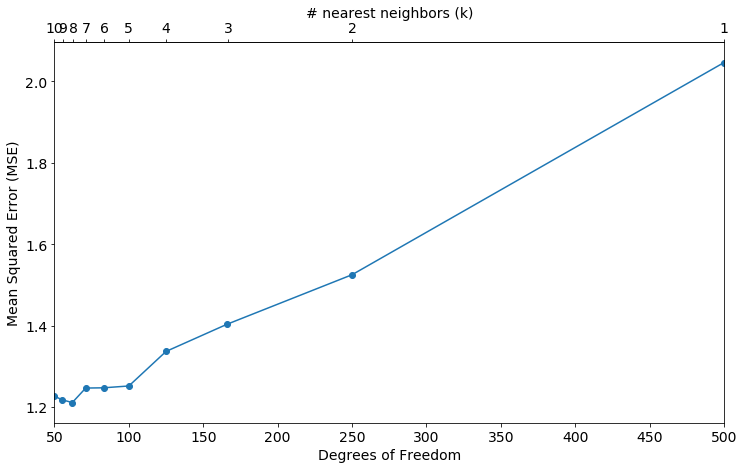

In [12]:
MSE = []
for i in range(1 , 11):
    y_predicted = myknn(X_test, X_train, y_train, i)
    MSE.append(sum((y_predicted - y_test)**2)/len(y_test))

plt.figure(figsize = (12,7))
x1 = plt.gca()
dof = [int(len(y_train)/k) for k in range(1,11)]

x1.plot(dof , MSE)
x1.scatter(dof, MSE)

x1.set_xlabel('Degrees of Freedom')
x1.set_ylabel('Mean Squared Error (MSE)')

x1.set_xlim([min(dof) , max(dof)])

def forward(x):
    return (500/x)
def inverse(x):
    return (500/x)

x2 = x1.secondary_xaxis('top', functions=(forward,inverse))
x2.set_xlabel('# nearest neighbors (k)')

plt.show()

The optimal $k$ value is $8$ and the associated degrees of freedom are $63$.

## Question 4 (20 Points) Curse of Dimensionality

Let's consider a high-dimensional setting. Keep the model the same as question 3. We consider two cases that both generate an additional set of 95 covariates:

  * Generate another 95-dimensional covariate with all independent standard Gaussian entries
  * Generate another 95-dimensional covariate using the formula $X^T A$, where $X$ is the original 5-dimensional vector, and $A$ is a $5 \times 95$ dimensional (fixed) matrix that remains the same for all observations. 
  
  You should generate $A$ only once using i.i.d. uniform $[0, 1]$ entries. Make sure that you set seed when generating these covariates. Fit KNN in both settings (with the total of 100 covariates) and select the best $k$ value. Answer the following questions

  * For each setting, what is the best $k$ and the best mean squared error for prediction?
  * In which setting $k$NN performs better? Should this be expected? Why?

In [13]:
seed = 1
X_new = norm.rvs(size = (1000 , 95), random_state = seed)
X1 = np.append(X, X_new, axis = 1)

A = uniform.rvs(size = (5 , 95), random_state = seed)
X2 = np.append(X, X.dot(A), axis = 1)

#Chossing a 10% split for MSE calculation as we perform a 10-fold CV
X1_train, y1_train, X1_test, y1_test = X1[:900,:] , y[:900], X1[900:,:], y[900:]
X2_train, y2_train, X2_test, y2_test = X2[:900,:] , y[:900], X2[900:,:], y[900:]

In [14]:
k = range(1, 101, 2)
testing_error_X1 = []
testing_error_X2 = []
MSE_X1 , MSE_X2 = [] , []
for n_neighbors in k:
    neigh = KNeighborsRegressor(n_neighbors = n_neighbors)
    
    testing_error_X1.append(np.mean(cross_val_score(neigh, X1, y, cv = 10)))
    neigh.fit(X1_train, y1_train)
    y1_predicted = neigh.predict(X1_test)
    MSE_X1.append(sum((y1_predicted - y1_test)**2)/len(y1_test))
    
    testing_error_X2.append(np.mean(cross_val_score(neigh, X2, y, cv = 10)))
    neigh.fit(X2_train, y2_train)
    y2_predicted = neigh.predict(X2_test)
    MSE_X2.append(sum((y2_predicted - y2_test)**2)/len(y2_test))

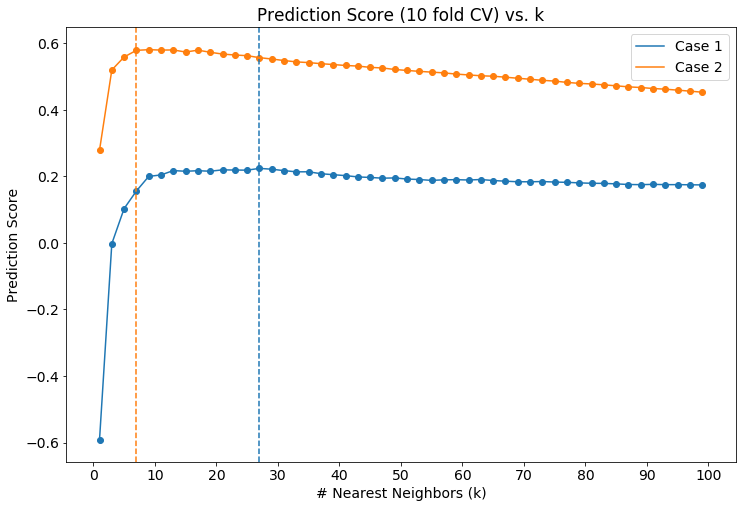

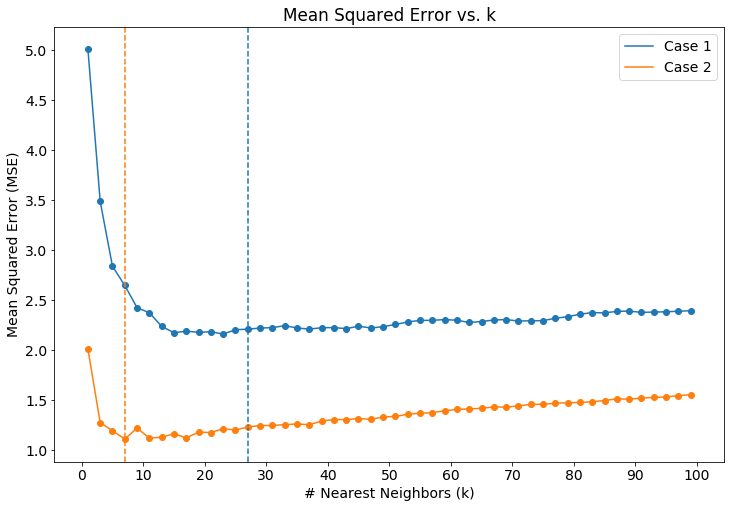

In [15]:
plt.figure(figsize = (12,8))

plt.plot(k, testing_error_X1, label =  'Case 1')
plt.scatter(k, testing_error_X1)
plt.axvline(np.argmax(testing_error_X1)*2 + 1, ls = '--', color = '#1f77b4')

plt.plot(k, testing_error_X2, label =  'Case 2')
plt.scatter(k, testing_error_X2)
plt.axvline(np.argmax(testing_error_X2)*2 - 1, ls = '--', color = '#ff7f0e')


plt.xticks(range(0, 101, 10))
plt.xlabel('# Nearest Neighbors (k)')
plt.ylabel('Prediction Score')
plt.legend()
plt.title('Prediction Score (10 fold CV) vs. k')
plt.show()

plt.figure(figsize = (12,8))

plt.plot(k, MSE_X1, label = 'Case 1')
plt.scatter(k, MSE_X1)
plt.axvline(np.argmax(testing_error_X1)*2 + 1, ls = '--', color = '#1f77b4')

plt.plot(k, MSE_X2, label = 'Case 2')
plt.scatter(k, MSE_X2)
plt.axvline(np.argmax(testing_error_X2)*2 - 1, ls = '--', color = '#ff7f0e')


plt.xticks(range(0, 101, 10))
plt.xlabel('# Nearest Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('Mean Squared Error vs. k')
plt.show()

From the first figure: best $k$ value for **Case 1 -> 27** and **Case 2 -> 7**

From the second figure: $MSE$ for **Case 1 -> 2.21** and **Case 2 -> 1.11**

We see that KNN performs better in the second case, as the prediction score and the Mean Squared Error are consistently better in Case 2. The predicted values $Y$ are same for both cases, but the $X$s in both cases are generated differently. Thus, the ***distribution of the covariates*** in the higher dimensions is different in each case. We can analyze this further in terms of the kNN model.

An excellent idea for visualization was obtained from Joel Grus' [Data Science from Scratch](https://www.amazon.com/gp/product/1492041130/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=1492041130&linkCode=as2&tag=petergrantpub-20&linkId=48ae2069a141e1f8e6cdb548b21c2eda) book and Peter Grant's [blog post](https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d#:~:text=The%20%E2%80%9CCurse%20of%20Dimensionality%E2%80%9D%20is,to%20keep%20the%20same%20density.). See the short code and the explanation below:

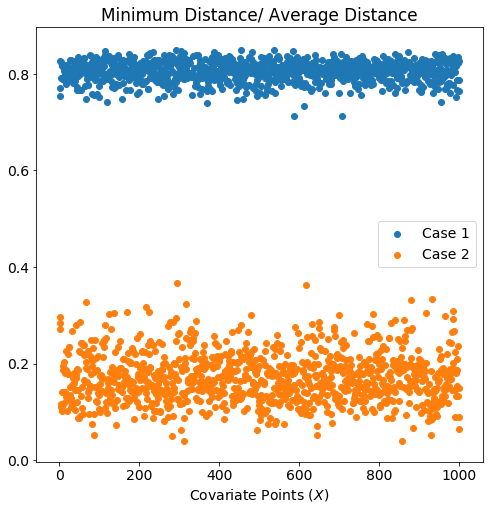

In [16]:
def get_distance_ratios(X):
    '''
    For each point in X, find the ratio minimum distance / average distance
    Inputs:
    - X : n x p vector of covariates
    
    Outputs:
    - ratiovec : n x 1 vector with each entry = min_dist/avg_dist
    '''
    n_points = X.shape[0]
    distmat = np.zeros([n_points , n_points])
    for i in range(n_points):
        for j in range(n_points):
            distmat[i,j] = np.linalg.norm(X[i] - X[j])
    
    mean = np.mean(distmat)
    
    for i in range(n_points):
        distmat[i,i] = mean
    
    ratiovec = np.zeros(n_points)
    ratiovec = np.min(distmat , axis = 1)/np.mean(distmat , axis = 1)
    
    return ratiovec

X1points = get_distance_ratios(X1)
X2points = get_distance_ratios(X2)
plt.figure(figsize = (8,8))
plt.scatter(range(1,len(X1points) + 1) , X1points, label = 'Case 1')
plt.scatter(range(1,len(X2points) + 1) , X2points, label = 'Case 2')
plt.legend()
plt.xlabel('Covariate Points ($X$)')
plt.title('Minimum Distance/ Average Distance')
plt.show()

To reduce bias in K-Nearest-Neighbours, we want the data points to be close to each other **in each dimension**. Thus, the curse of dimensionality adversely affects KNN performance. However, KNN may perform well in high dimensions if the high dimensional data is 'well segregated' or has underlying manifolds. The difference in KNN performance for the two cases we analyzed is due to these underlying manifolds.

In general, as the dimension increases, the average distance between the points increases. But, what's more problematic is the ratio between the minimum distance to the average distance. This is what we plot in the above figure - the ratio of the minimum to average distance for all the $X$ covariates in each case.

**It is important to note that as the ratio of minimum to average distance $\rightarrow$ 1, the performance of KNN deteriorates as the closest point and an average point become less and less distinguishable.**

From our two cases, the first case has a very high ratio of closest to average distance as compared to the second case. This means that datapoints in the second case are closer together than those in the first case. It naturally follows that the second case shows better KNN performance than the first.